In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def gauss(x, r, sigma):
    
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - r)**2 / (2 * sigma**2))

vec_gauss = np.vectorize(gauss)

In [38]:
def integrate(x, y):
    
    return np.sum(y) * (x[1] - x[0])

In [70]:
def sigmoid(x, sigma):
    
    y = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        
        y[i] = 1 - integrate(np.linspace(1, 6, 2000), gauss(np.linspace(1, 6, 2000), x[i], sigma))
        
    return y

In [121]:
x = np.linspace(0, 6, 6000)
y1 = vec_gauss(x, 1, 0.1)
y2 = vec_gauss(x, 1, 0.3)
#y3 = vec_gauss(x, 1, 0.01)

sigm1 =  sigmoid(x, 0.01)
sigm2 =  sigmoid(x, 0.5)
sigm3 =  sigmoid(x, 0.1)

Будем считать, что система закреплена на человеке и относительно него определяется положение стены. В таком случае положение стены задаётся нормальным распередением с СКО системы.

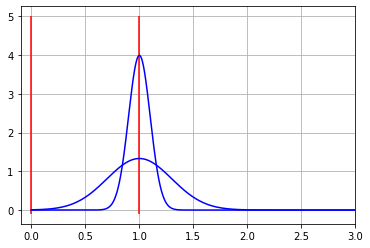

In [122]:
plt.vlines(0, -0.1, 5, color='r')
plt.vlines(1, -0.1, 5, color='r')

plt.plot(x, y1, color='b')

plt.xlim([-0.1, 3])
plt.plot(x, y2, color='b')
#plt.plot(x, y3, color='b')
plt.grid()

В таком случае возможно расмотреть вероятность срабатывания системы при некотором положении стены на расстоянии r от человека.
Эту величину будет считать как разность единицы и интеграла распределения плотности вероятности нахождения стены вне 
опасной зоны. Форма этого распределния будет сигмоидой. 

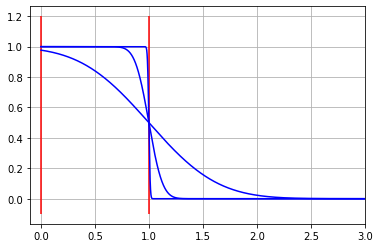

In [117]:
plt.vlines(0, -0.1, 1.2, color='r')
plt.vlines(1, -0.1, 1.2, color='r')

plt.plot(x, sigm1, color='b')
plt.plot(x, sigm2, color='b')
plt.plot(x, sigm3, color='b')

plt.xlim([-0.1, 3])
#plt.plot(x, y2, color='b')
#plt.plot(x, y3, color='b')
plt.grid()

In [110]:
sigm = np.linspace(0.01, 0.5, 100)

p = np.zeros(100)

for i in range(100):
    
    p[i] = integrate(x[:1000], sigmoid(x, sigm[i])[:1000])

На основе вероятности срабатывания системы от r можно оценить, какова вероятность срабатывания системы в опасной зоне, т.е.
от 0 до 1 м.

На бесконечности сигмоида не описывает плотность вероятности, однако возможно нормировать её так, чтобы на заданном промежутке 
она удовлетворяла условию органиченности. Для этого стоит ответить на вопрос, в каком случае система будет срабатывать в 100% 
случаев. Такое возможно только в случае СКО равном 0. Тогда плотность вероятности будет представлять прямоугольник высотой 
1 / (1 м) и длинной 1 м, что и будет являться нормировкой.

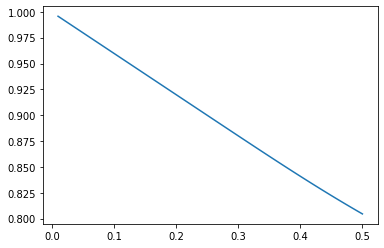

In [111]:
plt.plot(sigm, p)

Таким образом, исследовав зависимость срабатывания системы в опасной зоне от СКО, можно сказать, что вероятность срабатывания системы равное 80% будет достигаться при СКО равном 0.5 м, а почти равным 100% (99.5%) будет достигаться при 0.01 м.

Подобный подход рассматривает работу системы вдоль одного направления (стена-человек). Если система обладает некоторым круговым датчиком, то необходимое для достижения тех же точностей СКО будет увеличиваться, т.к. в такой системе есть возможность получения выборки расстояний до стены.